## <center>Prueba 2 Simulación Chimborazo</center>

**Estudiante:** Adriana Castillo

**Personal:** 115

**Camas:** 300

**Respiradores:** 5

**UCI:** 5

**CASOS Iniciales:** 100


### Obtener Media

In [1]:
import pandas as pd
import numpy as np

url = 'Casos.xlsx'
df = pd.read_excel(url)
df = df.replace(np.nan, 0)
df=df[df['Provincia']=="Chimborazo"]
filtro = df.iloc[0].loc['19/3/2020':]
media = filtro.mean()*3
print(media)

146.9142857142857


In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS
HOSPITALES = 1
CAMAS = 300
RESPIRADORES=5
UCI=5
PERSONAL=115

INFECTADOS= 100
TASA_CRECIMIENTO = int(media)
DIAS_INTERNADO = 10
DIAS_SIMULACION = 100

persona_recuperadas={}
persona_fallecidas={}

adultos_femenino=[]
adultos_masculino=[]

mayores_femenino=[]
mayores_masculino=[]

niños_femenino=[]
niños_masculino=[]

niños_femenino_sintomas=[]
niños_masculino_sintomas=[]
niños_femenino_nuemonia=[]
niños_masculino_nuemonia=[]
niños_femenino_cuidados=[]
niños_masculino_cuidados=[]
niños_femenino_fallecidos=[]
niños_masculino_fallecidos=[]
niños_femenino_recuperados=[]
niños_masculino_recuperados=[]

adultos_femeninos_nuemonia=[]
adultos_femeninos_cuidados=[]
adultos_femeninos_fallecidos=[]
adultos_femeninos_recuperados=[]
adultos_masculino_nuemonia=[]
adultos_masculino_cuidados=[]
adultos_masculino_fallecidos=[]
adultos_masculino_recuperados=[]

mayores_femeninos_nuemonia=[]
mayores_femeninos_cuidados=[]
mayores_femeninos_fallecidos=[]
mayores_femeninos_recuperados=[]
mayores_masculino_nuemonia=[]
mayores_masculino_cuidados=[]
mayores_masculino_fallecidos=[]
mayores_masculino_recuperados=[]


class Hospital(object):

    def __init__(self, env,num_cama,name,num_personal,num_uci, num_respiradores):
            self.env = env
            self.num_cama = num_cama
            self.num_personal = num_personal
            self.num_uci=num_uci
            self.num_respiradores=num_respiradores
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.uci = simpy.Resource(env, num_uci)
            self.respiradores = simpy.Resource(env, num_respiradores)
            self.name = name
        
    def ingresar(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("Paciente Nº", paciente, "salió de la hospitalización en el día ", int(self.env.now))
            
    def ucis(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente Nº", paciente, "salió de la UCI en el día ", int(self.env.now))
    
    def medicos(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente Nº", paciente, "finalizó su atención con el personal el día ", int(self.env.now))
    
def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    tipo_paciente = random.randint(1,100)
    
    ##LLEGA MAYOR
    if (tipo_paciente <= 7 and tipo_paciente > 0):
        
        genero= random.randint(1,7)
        if(genero<=3):
            mayores_masculino.append(1)
            ##HOMBRE
            
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                mayores_masculino_nuemonia.append(1)

                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente mayor (Masculino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor (Masculino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                mayores_masculino_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente mayor (Masculino) Nº", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            mayores_masculino_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            mayores_masculino_recuperados.append(1)

                                    else:
                                        print("El paciente mayor (Masculino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        mayores_masculino_fallecidos.append(1)

                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                mayores_masculino_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        mayores_masculino_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                mayores_masculino_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
            
            
        else:
            ##MUJER
            mayores_femenino.append(1)
            
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                mayores_femeninos_nuemonia.append(1)
                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente mayor (Femenino) Nº", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor (Femenino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                ##ASIGNAR UCI/RESPIRADOR
                                mayores_femeninos_cuidados.append(1)

                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente mayor (Femenino) Nº", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            mayores_femeninos_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            mayores_femeninos_recuperados.append(1)
                                    else:
                                        print("El paciente mayor (Femenino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        mayores_femeninos_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                mayores_femeninos_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        mayores_femeninos_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                mayores_femeninos_recuperados.append(1)
            ####Fin ETAPA NEUMONIA

   
    elif (tipo_paciente <= 28 and tipo_paciente > 7):
        ### LLEGA NIÑO

        genero= random.randint(1,28)
        if(genero<=13):
            niños_masculino.append(1)
            ##HOMBRE
            
            ##ETAPA SINTOMAS
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                niños_masculino_sintomas.append(1)

                ##ETAPA NUEMONIA
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    niños_masculino_nuemonia.append(1)

                    ##ASIGNAR CAMAS
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in requerimientoCamas:
                            print("Paciente niño Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now

                            ##ASIGNAR PERSONAL
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente niño Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    niños_masculino_cuidados.append(1)
                                    ##ASIGNAR UCI/RESPIRADOR
                                    with hospital.uci.request() as uci:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                        requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if uci in requerimientoUCI:
                                            print("El paciente niño Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.ucis(paciente))
                                            estado = random.randint(1,100)
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                niños_masculino_fallecidos.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                niños_masculino_recuperados.append(1)
                                        else:
                                            print("El paciente niño Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            niños_masculino_fallecidos.append(1)
                                        ####Fin CUIDADOS INTENSIVOS
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                    niños_masculino_recuperados.append(1)
                                    ####Fin ETAPA Intensivos

                                ####Fin PERSONAL
                        else:
                            print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            niños_masculino_fallecidos.append(1)
                        ####Fin CAMAS
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                    niños_masculino_recuperados.append(1)

                ####Fin ETAPA NEUMONIA

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Sintomas")
                niños_masculino_recuperados.append(1)
            ####Fin ETAPA SINTOMAS
            
        else:
            niños_femenino.append(1)
            ##MUJER
            
            ##ETAPA SINTOMAS
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                niños_femenino_sintomas.append(1)
                
                ##ETAPA NUEMONIA
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    niños_femenino_nuemonia.append(1)

                    ##ASIGNAR CAMAS
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in requerimientoCamas:
                            print("Paciente niña Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now

                            ##ASIGNAR PERSONAL
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente niña Nº ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    niños_femenino_cuidados.append(1)
                                    ##ASIGNAR UCI/RESPIRADOR
                                    with hospital.uci.request() as uci:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                        requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if uci in requerimientoUCI:
                                            print("El paciente niña Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.ucis(paciente))
                                            estado = random.randint(1,100)
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                niños_femenino_fallecidos.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                niños_femenino_recuperados.append(1)
                                        else:
                                            print("El paciente niña Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            niños_femenino_fallecidos.append(1)
                                        ####Fin CUIDADOS INTENSIVOS
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                    niños_femenino_recuperados.append(1)
                                    ####Fin ETAPA Intensivos

                                ####Fin PERSONAL
                        else:
                            print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            niños_femenino_fallecidos.append(1)
                        ####Fin CAMAS
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                    niños_femenino_recuperados.append(1)
                ####Fin ETAPA NEUMONIA

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Sintomas")
                niños_femenino_recuperados.append(1)
            ####Fin ETAPA SINTOMAS
            
        
    else:
        ##LLEGA ADULTO
        
        genero= random.randint(1,65)
        
        if(genero<=30):
            adultos_masculino.append(1)
            ##HOMBRE  
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                adultos_masculino_nuemonia.append(1)
                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente adulto (Masculino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now
                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto (Masculino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                adultos_masculino_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente adulto (Masculino) Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            adultos_masculino_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            adultos_masculino_recuperados.append(1)
                                    else:
                                        print("El paciente adulto (Masculino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        adultos_masculino_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                adultos_masculino_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        adultos_masculino_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                adultos_masculino_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
        
        else:
            adultos_femenino.append(1)
        ##MUJER
        
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                adultos_femeninos_nuemonia.append(1)

                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente adulto (Femenino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto (Femenino) Nº ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                adultos_femeninos_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente adulto (Femenino) Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            adultos_femeninos_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            adultos_femeninos_recuperados.append(1)
                                    else:
                                        print("El paciente adulto (Femenino) Nº " , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        adultos_femeninos_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                adultos_femeninos_recuperados.append(1)
                                ####Fin ETAPA Intensivos
                            ####Fin PERSONAL
                    else:
                        print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        adultos_femeninos_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                adultos_femeninos_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
        
        
       
    
def ejecutar(env, tasa_crecimiento, infectados):
    hospital = Hospital(env, CAMAS, "General Docente",PERSONAL,UCI,RESPIRADORES)
    for i in range(infectados):
        asignar_hospital(env, hospital, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega el paciente Nº", paciente, " en el día ", env.now)
        env.process(llegada_paciente(env, hospital, paciente))

print("\t\t\tSimulacion COVID-19 en Hospital General Docente (Chimborazo)\n")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO,INFECTADOS))
env.run(until=DIAS_SIMULACION)


			Simulacion COVID-19 en Hospital General Docente (Chimborazo)

Llega el paciente Nº 0  en el día  0
Llega el paciente Nº 1  en el día  0
Llega el paciente Nº 2  en el día  0
Llega el paciente Nº 3  en el día  0
Llega el paciente Nº 4  en el día  0
Llega el paciente Nº 5  en el día  0
Llega el paciente Nº 6  en el día  0
Llega el paciente Nº 7  en el día  0
Llega el paciente Nº 8  en el día  0
Llega el paciente Nº 9  en el día  0
Llega el paciente Nº 10  en el día  0
Llega el paciente Nº 11  en el día  0
Llega el paciente Nº 12  en el día  0
Llega el paciente Nº 13  en el día  0
Llega el paciente Nº 14  en el día  0
Llega el paciente Nº 15  en el día  0
Llega el paciente Nº 16  en el día  0
Llega el paciente Nº 17  en el día  0
Llega el paciente Nº 18  en el día  0
Llega el paciente Nº 19  en el día  0
Llega el paciente Nº 20  en el día  0
Llega el paciente Nº 21  en el día  0
Llega el paciente Nº 22  en el día  0
Llega el paciente Nº 23  en el día  0
Llega el paciente Nº 24  en el dí

Paciente adulto (Femenino) Nº  168  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  171  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  172  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  174  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  179  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  180  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  181  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  183  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  184  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  185  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  186  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  187  se le asigna una cama 

Paciente niña Nº  378  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  379  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  380  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  381  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  383  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  384  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  386  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  387  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  388  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  390  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  392  se le asigna una cama  hospital  General Docente
Llega el paciente Nº 393  en el día  3
Llega el paciente Nº 394  en el d

Llega el paciente Nº 611  en el día  4
Llega el paciente Nº 612  en el día  4
Llega el paciente Nº 613  en el día  4
Llega el paciente Nº 614  en el día  4
Llega el paciente Nº 615  en el día  4
Llega el paciente Nº 616  en el día  4
Llega el paciente Nº 617  en el día  4
Llega el paciente Nº 618  en el día  4
Llega el paciente Nº 619  en el día  4
Llega el paciente Nº 620  en el día  4
Llega el paciente Nº 621  en el día  4
Llega el paciente Nº 622  en el día  4
Llega el paciente Nº 623  en el día  4
Llega el paciente Nº 624  en el día  4
Llega el paciente Nº 625  en el día  4
Llega el paciente Nº 626  en el día  4
Llega el paciente Nº 627  en el día  4
Llega el paciente Nº 628  en el día  4
Llega el paciente Nº 629  en el día  4
Llega el paciente Nº 630  en el día  4
Llega el paciente Nº 631  en el día  4
Llega el paciente Nº 632  en el día  4
Llega el paciente Nº 633  en el día  4
Llega el paciente Nº 634  en el día  4
Llega el paciente Nº 635  en el día  4
Llega el paciente Nº 636 

Llega el paciente Nº 929  en el día  6
Llega el paciente Nº 930  en el día  6
Llega el paciente Nº 931  en el día  6
Llega el paciente Nº 932  en el día  6
Llega el paciente Nº 933  en el día  6
Llega el paciente Nº 934  en el día  6
Llega el paciente Nº 935  en el día  6
Llega el paciente Nº 936  en el día  6
Llega el paciente Nº 937  en el día  6
Llega el paciente Nº 938  en el día  6
Llega el paciente Nº 939  en el día  6
Llega el paciente Nº 940  en el día  6
Llega el paciente Nº 941  en el día  6
Llega el paciente Nº 942  en el día  6
Llega el paciente Nº 943  en el día  6
Llega el paciente Nº 944  en el día  6
Llega el paciente Nº 945  en el día  6
Llega el paciente Nº 946  en el día  6
Llega el paciente Nº 947  en el día  6
Llega el paciente Nº 948  en el día  6
Llega el paciente Nº 949  en el día  6
Llega el paciente Nº 950  en el día  6
Llega el paciente Nº 951  en el día  6
Llega el paciente Nº 952  en el día  6
Llega el paciente Nº 953  en el día  6
Llega el paciente Nº 954 

Llega el paciente Nº 1217  en el día  8
Llega el paciente Nº 1218  en el día  8
Llega el paciente Nº 1219  en el día  8
Llega el paciente Nº 1220  en el día  8
Llega el paciente Nº 1221  en el día  8
Llega el paciente Nº 1222  en el día  8
Llega el paciente Nº 1223  en el día  8
Llega el paciente Nº 1224  en el día  8
Llega el paciente Nº 1225  en el día  8
Llega el paciente Nº 1226  en el día  8
Llega el paciente Nº 1227  en el día  8
Llega el paciente Nº 1228  en el día  8
Llega el paciente Nº 1229  en el día  8
Llega el paciente Nº 1230  en el día  8
Llega el paciente Nº 1231  en el día  8
Llega el paciente Nº 1232  en el día  8
Llega el paciente Nº 1233  en el día  8
Llega el paciente Nº 1234  en el día  8
Llega el paciente Nº 1235  en el día  8
Llega el paciente Nº 1236  en el día  8
Llega el paciente Nº 1237  en el día  8
Llega el paciente Nº 1238  en el día  8
Llega el paciente Nº 1239  en el día  8
Llega el paciente Nº 1240  en el día  8
Llega el paciente Nº 1241  en el día  8


Llega el paciente Nº 1441  en el día  10
Llega el paciente Nº 1442  en el día  10
Llega el paciente Nº 1443  en el día  10
Llega el paciente Nº 1444  en el día  10
Llega el paciente Nº 1445  en el día  10
Llega el paciente Nº 1446  en el día  10
Llega el paciente Nº 1447  en el día  10
Llega el paciente Nº 1448  en el día  10
Llega el paciente Nº 1449  en el día  10
Llega el paciente Nº 1450  en el día  10
Llega el paciente Nº 1451  en el día  10
Llega el paciente Nº 1452  en el día  10
Llega el paciente Nº 1453  en el día  10
Llega el paciente Nº 1454  en el día  10
Llega el paciente Nº 1455  en el día  10
Llega el paciente Nº 1456  en el día  10
Llega el paciente Nº 1457  en el día  10
Llega el paciente Nº 1458  en el día  10
Llega el paciente Nº 1459  en el día  10
Llega el paciente Nº 1460  en el día  10
Llega el paciente Nº 1461  en el día  10
Llega el paciente Nº 1462  en el día  10
Llega el paciente Nº 1463  en el día  10
Llega el paciente Nº 1464  en el día  10
Llega el pacient

Paciente adulto (Femenino) Nº  687 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  713 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 724 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 733 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 752 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  764 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 772 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 812 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama


Llega el paciente Nº 1904  en el día  13
Llega el paciente Nº 1905  en el día  13
Llega el paciente Nº 1906  en el día  13
Llega el paciente Nº 1907  en el día  13
Llega el paciente Nº 1908  en el día  13
Llega el paciente Nº 1909  en el día  13
Llega el paciente Nº 1910  en el día  13
Llega el paciente Nº 1911  en el día  13
Llega el paciente Nº 1912  en el día  13
Llega el paciente Nº 1913  en el día  13
Llega el paciente Nº 1914  en el día  13
Llega el paciente Nº 1915  en el día  13
Llega el paciente Nº 1916  en el día  13
Llega el paciente Nº 1917  en el día  13
Llega el paciente Nº 1918  en el día  13
Llega el paciente Nº 1919  en el día  13
Llega el paciente Nº 1920  en el día  13
Llega el paciente Nº 1921  en el día  13
Llega el paciente Nº 1922  en el día  13
Llega el paciente Nº 1923  en el día  13
Llega el paciente Nº 1924  en el día  13
Llega el paciente Nº 1925  en el día  13
Llega el paciente Nº 1926  en el día  13
Llega el paciente Nº 1927  en el día  13
Llega el pacient

Llega el paciente Nº 2094  en el día  14
Llega el paciente Nº 2095  en el día  14
Llega el paciente Nº 2096  en el día  14
Llega el paciente Nº 2097  en el día  14
Llega el paciente Nº 2098  en el día  14
Llega el paciente Nº 2099  en el día  14
Llega el paciente Nº 2100  en el día  14
Llega el paciente Nº 2101  en el día  14
Llega el paciente Nº 2102  en el día  14
Llega el paciente Nº 2103  en el día  14
Llega el paciente Nº 2104  en el día  14
Llega el paciente Nº 2105  en el día  14
Llega el paciente Nº 2106  en el día  14
Llega el paciente Nº 2107  en el día  14
Llega el paciente Nº 2108  en el día  14
Llega el paciente Nº 2109  en el día  14
Llega el paciente Nº 2110  en el día  14
Llega el paciente Nº 2111  en el día  14
Llega el paciente Nº 2112  en el día  14
Llega el paciente Nº 2113  en el día  14
Llega el paciente Nº 2114  en el día  14
Llega el paciente Nº 2115  en el día  14
Llega el paciente Nº 2116  en el día  14
Llega el paciente Nº 2117  en el día  14
Llega el pacient

Paciente adulto (Masculino) Nº 792 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  811 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 32 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 848 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 856 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 900 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 908 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama.
Paciente mayor (Masculino) Nº 923 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama.
Paciente adu

Paciente adulto (Femenino) Nº  1695 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1700 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  51 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  394 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  399 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  402 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Masculino) Nº 467 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 470 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 473 en el hospital  Gen

Paciente Nº 160 finalizó su atención con el personal el día  18
Paciente Nº 213 finalizó su atención con el personal el día  18
Paciente Nº 380 finalizó su atención con el personal el día  18
Paciente Nº 24 finalizó su atención con el personal el día  18
Paciente Nº 135 finalizó su atención con el personal el día  18
Paciente Nº 70 finalizó su atención con el personal el día  18
Paciente Nº 36 finalizó su atención con el personal el día  18
Paciente Nº 147 finalizó su atención con el personal el día  18
Paciente Nº 208 finalizó su atención con el personal el día  18
Paciente Nº 515 salió de la hospitalización en el día  18
Paciente Nº 517 salió de la hospitalización en el día  18
Paciente Nº 595 salió de la hospitalización en el día  18
Llega el paciente Nº 2583  en el día  18
Llega el paciente Nº 2584  en el día  18
Llega el paciente Nº 2585  en el día  18
Llega el paciente Nº 2586  en el día  18
Llega el paciente Nº 2587  en el día  18
Llega el paciente Nº 2588  en el día  18
Llega e

Llega el paciente Nº 2837  en el día  19
Llega el paciente Nº 2838  en el día  19
Llega el paciente Nº 2839  en el día  19
Llega el paciente Nº 2840  en el día  19
Llega el paciente Nº 2841  en el día  19
Llega el paciente Nº 2842  en el día  19
Llega el paciente Nº 2843  en el día  19
Llega el paciente Nº 2844  en el día  19
Llega el paciente Nº 2845  en el día  19
Llega el paciente Nº 2846  en el día  19
Llega el paciente Nº 2847  en el día  19
Llega el paciente Nº 2848  en el día  19
Llega el paciente Nº 2849  en el día  19
Llega el paciente Nº 2850  en el día  19
Llega el paciente Nº 2851  en el día  19
Llega el paciente Nº 2852  en el día  19
Llega el paciente Nº 2853  en el día  19
Llega el paciente Nº 2854  en el día  19
Llega el paciente Nº 2855  en el día  19
Llega el paciente Nº 2856  en el día  19
Llega el paciente Nº 2857  en el día  19
Llega el paciente Nº 2858  en el día  19
Llega el paciente Nº 2859  en el día  19
Llega el paciente Nº 2860  en el día  19
Llega el pacient

Paciente adulto (Femenino) Nº  1454 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1489 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 1499 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1523 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 1525 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 1531 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1536 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 1539 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso

Paciente adulto (Masculino) Nº  1351  se le asigna una cama  hospital  General Docente
Paciente Nº 111 finalizó su atención con el personal el día  22
Paciente Nº 143 finalizó su atención con el personal el día  22
Paciente Nº 217 finalizó su atención con el personal el día  22
Paciente Nº 324 finalizó su atención con el personal el día  22
Paciente Nº 243 finalizó su atención con el personal el día  22
Paciente Nº 57 finalizó su atención con el personal el día  22
Paciente Nº 127 finalizó su atención con el personal el día  22
Paciente Nº 85 finalizó su atención con el personal el día  22
Paciente Nº 97 finalizó su atención con el personal el día  22
Paciente Nº 155 finalizó su atención con el personal el día  22
Paciente Nº 198 finalizó su atención con el personal el día  22
Paciente Nº 516 salió de la hospitalización en el día  22
Paciente Nº 538 salió de la hospitalización en el día  22
Paciente Nº 544 salió de la hospitalización en el día  22
Paciente Nº 688 salió de la hospitaliz

Llega el paciente Nº 3352  en el día  23
Llega el paciente Nº 3353  en el día  23
Llega el paciente Nº 3354  en el día  23
Llega el paciente Nº 3355  en el día  23
Llega el paciente Nº 3356  en el día  23
Llega el paciente Nº 3357  en el día  23
Llega el paciente Nº 3358  en el día  23
Llega el paciente Nº 3359  en el día  23
Llega el paciente Nº 3360  en el día  23
Llega el paciente Nº 3361  en el día  23
Llega el paciente Nº 3362  en el día  23
Llega el paciente Nº 3363  en el día  23
Llega el paciente Nº 3364  en el día  23
Llega el paciente Nº 3365  en el día  23
Llega el paciente Nº 3366  en el día  23
Llega el paciente Nº 3367  en el día  23
Llega el paciente Nº 3368  en el día  23
Llega el paciente Nº 3369  en el día  23
Llega el paciente Nº 3370  en el día  23
Llega el paciente Nº 3371  en el día  23
Llega el paciente Nº 3372  en el día  23
Llega el paciente Nº 3373  en el día  23
Llega el paciente Nº 3374  en el día  23
Llega el paciente Nº 3375  en el día  23
Llega el pacient

Llega el paciente Nº 3588  en el día  24
Llega el paciente Nº 3589  en el día  24
Llega el paciente Nº 3590  en el día  24
Llega el paciente Nº 3591  en el día  24
Llega el paciente Nº 3592  en el día  24
Llega el paciente Nº 3593  en el día  24
Llega el paciente Nº 3594  en el día  24
Llega el paciente Nº 3595  en el día  24
Llega el paciente Nº 3596  en el día  24
Llega el paciente Nº 3597  en el día  24
Llega el paciente Nº 3598  en el día  24
Llega el paciente Nº 3599  en el día  24
Llega el paciente Nº 3600  en el día  24
Llega el paciente Nº 3601  en el día  24
Llega el paciente Nº 3602  en el día  24
Llega el paciente Nº 3603  en el día  24
Llega el paciente Nº 3604  en el día  24
Paciente adulto (Masculino) Nº 3459 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  3465 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  3466 en el hospital  General Docente se ha recuperado en la 

Paciente niña Nº 3645 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3651 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3657 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  3658 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3664 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3666 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 3669 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 3671 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3672 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 3680 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 3681 en el hospital  

Paciente adulto (Femenino) Nº  3806 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 3809 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 3811 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3812 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3815 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 3821 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 3825 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3827 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3829 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 3832 en el hospital  General Docente se ha recuperado en la etapa Neumo

Paciente niña Nº 4042 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  49 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 71 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 172 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  174 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 359 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  60 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 205 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 1964 en el hospital  General Docente  espero  14  dias y fallece por fal

Paciente niño Nº 4188 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  264 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 386 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2193 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2201 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2206 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2212 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2216 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2225 en el

Paciente adulto (Masculino) Nº 2610 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2614 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2619 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2622 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2671 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2689 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2727 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2776 en el hospital  General Docente  espero  10  dias y fallece por falta de ac

Paciente adulto (Masculino) Nº 3463 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3482 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 3504 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3529 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3547 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3588 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3603 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3641 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una

Paciente mayor (Femenino) Nº 1361 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 1401 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 1505 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 809 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  979 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  1006 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 1429 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº  2673  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  837  es atendido por el personal  hospital  General Docente
Pacien

Paciente Nº 1538 salió de la hospitalización en el día  33
Paciente Nº 1584 salió de la hospitalización en el día  33
Paciente Nº 1652 salió de la hospitalización en el día  33
Paciente Nº 2184 salió de la hospitalización en el día  33
Llega el paciente Nº 4773  en el día  33
Llega el paciente Nº 4774  en el día  33
Llega el paciente Nº 4775  en el día  33
Llega el paciente Nº 4776  en el día  33
Llega el paciente Nº 4777  en el día  33
Llega el paciente Nº 4778  en el día  33
Llega el paciente Nº 4779  en el día  33
Llega el paciente Nº 4780  en el día  33
Llega el paciente Nº 4781  en el día  33
Llega el paciente Nº 4782  en el día  33
Llega el paciente Nº 4783  en el día  33
Llega el paciente Nº 4784  en el día  33
Llega el paciente Nº 4785  en el día  33
Llega el paciente Nº 4786  en el día  33
Llega el paciente Nº 4787  en el día  33
Llega el paciente Nº 4788  en el día  33
Llega el paciente Nº 4789  en el día  33
Llega el paciente Nº 4790  en el día  33
Llega el paciente Nº 4791 

Llega el paciente Nº 4956  en el día  34
Llega el paciente Nº 4957  en el día  34
Llega el paciente Nº 4958  en el día  34
Llega el paciente Nº 4959  en el día  34
Llega el paciente Nº 4960  en el día  34
Llega el paciente Nº 4961  en el día  34
Llega el paciente Nº 4962  en el día  34
Llega el paciente Nº 4963  en el día  34
Llega el paciente Nº 4964  en el día  34
Llega el paciente Nº 4965  en el día  34
Llega el paciente Nº 4966  en el día  34
Llega el paciente Nº 4967  en el día  34
Llega el paciente Nº 4968  en el día  34
Llega el paciente Nº 4969  en el día  34
Llega el paciente Nº 4970  en el día  34
Llega el paciente Nº 4971  en el día  34
Llega el paciente Nº 4972  en el día  34
Llega el paciente Nº 4973  en el día  34
Llega el paciente Nº 4974  en el día  34
Llega el paciente Nº 4975  en el día  34
Llega el paciente Nº 4976  en el día  34
Llega el paciente Nº 4977  en el día  34
Llega el paciente Nº 4978  en el día  34
Llega el paciente Nº 4979  en el día  34
Llega el pacient

Llega el paciente Nº 5119  en el día  35
Llega el paciente Nº 5120  en el día  35
Llega el paciente Nº 5121  en el día  35
Llega el paciente Nº 5122  en el día  35
Llega el paciente Nº 5123  en el día  35
Llega el paciente Nº 5124  en el día  35
Llega el paciente Nº 5125  en el día  35
Llega el paciente Nº 5126  en el día  35
Llega el paciente Nº 5127  en el día  35
Llega el paciente Nº 5128  en el día  35
Llega el paciente Nº 5129  en el día  35
Llega el paciente Nº 5130  en el día  35
Llega el paciente Nº 5131  en el día  35
Llega el paciente Nº 5132  en el día  35
Llega el paciente Nº 5133  en el día  35
Llega el paciente Nº 5134  en el día  35
Llega el paciente Nº 5135  en el día  35
Llega el paciente Nº 5136  en el día  35
Llega el paciente Nº 5137  en el día  35
Llega el paciente Nº 5138  en el día  35
Llega el paciente Nº 5139  en el día  35
Llega el paciente Nº 5140  en el día  35
Llega el paciente Nº 5141  en el día  35
Llega el paciente Nº 5142  en el día  35
Llega el pacient

Llega el paciente Nº 5319  en el día  36
Llega el paciente Nº 5320  en el día  36
Llega el paciente Nº 5321  en el día  36
Llega el paciente Nº 5322  en el día  36
Llega el paciente Nº 5323  en el día  36
Llega el paciente Nº 5324  en el día  36
Llega el paciente Nº 5325  en el día  36
Llega el paciente Nº 5326  en el día  36
Llega el paciente Nº 5327  en el día  36
Llega el paciente Nº 5328  en el día  36
Llega el paciente Nº 5329  en el día  36
Llega el paciente Nº 5330  en el día  36
Llega el paciente Nº 5331  en el día  36
Llega el paciente Nº 5332  en el día  36
Llega el paciente Nº 5333  en el día  36
Llega el paciente Nº 5334  en el día  36
Llega el paciente Nº 5335  en el día  36
Llega el paciente Nº 5336  en el día  36
Llega el paciente Nº 5337  en el día  36
Llega el paciente Nº 5338  en el día  36
Llega el paciente Nº 5339  en el día  36
Llega el paciente Nº 5340  en el día  36
Llega el paciente Nº 5341  en el día  36
Llega el paciente Nº 5342  en el día  36
Llega el pacient

Paciente adulto (Femenino) Nº  5362 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  5365 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 5368 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 5371 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 5372 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 5373 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5374 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 5375 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5376 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  5377 en el hospital  General Docente se ha recuperado en 

Paciente adulto (Femenino) Nº  5622 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 5623 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5628 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 5630 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5634 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 5644 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 5646 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 508 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  579 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  952 en el hospital  General Docente se ha recuperad

Paciente adulto (Femenino) Nº  4037 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4039 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4052 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4072 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4139 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4140 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4156 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4168 en el hospital  General Docente  espero  11  dias y fallece por falta de ac

Paciente adulto (Masculino) Nº 4667 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4684 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4734 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4746 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4751 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 4757 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4790 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4815 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una

Paciente adulto (Femenino) Nº  4822 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4879 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4887 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4895 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4903 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4913 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4934 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4938 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  5047 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5054 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5085 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5086 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5087 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 5099 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5115 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5134 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una

Paciente mayor (Masculino) Nº 4810 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  4819 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4824 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 4832 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4843 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4857 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4869 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4886 en el hospital  General Docente  espero  10  dias y fallece por falta de acce

Paciente adulto (Femenino) Nº  5141 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5143 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5168 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 5171 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama.
Paciente niño Nº 5282 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5321 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5352 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5364 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Pacien

Paciente adulto (Femenino) Nº  5908 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5912 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5923 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5924 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2384 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2738 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  2768 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2797 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) N

Paciente adulto (Femenino) Nº  4917  se le asigna una cama  hospital  General Docente
Paciente Nº 1054 finalizó su atención con el personal el día  47
Paciente Nº 642 finalizó su atención con el personal el día  47
Paciente Nº 2793 salió de la hospitalización en el día  47
Paciente Nº 2803 salió de la hospitalización en el día  47
Paciente Nº 2859 salió de la hospitalización en el día  47
Paciente Nº 2882 salió de la hospitalización en el día  47
Paciente Nº 2906 salió de la hospitalización en el día  47
Paciente Nº 2920 salió de la hospitalización en el día  47
Paciente Nº 2966 salió de la hospitalización en el día  47
Paciente Nº 3120 salió de la hospitalización en el día  47
Paciente Nº 3146 salió de la hospitalización en el día  47
Paciente Nº 3154 salió de la hospitalización en el día  47
Paciente Nº 523 salió de la UCI en el día  47
Paciente Nº 3620 salió de la hospitalización en el día  47
Paciente Nº 3767 salió de la hospitalización en el día  47
Paciente Nº 2213 finalizó su at

Llega el paciente Nº 6976  en el día  48
Llega el paciente Nº 6977  en el día  48
Llega el paciente Nº 6978  en el día  48
Llega el paciente Nº 6979  en el día  48
Llega el paciente Nº 6980  en el día  48
Llega el paciente Nº 6981  en el día  48
Llega el paciente Nº 6982  en el día  48
Llega el paciente Nº 6983  en el día  48
Llega el paciente Nº 6984  en el día  48
Llega el paciente Nº 6985  en el día  48
Llega el paciente Nº 6986  en el día  48
Llega el paciente Nº 6987  en el día  48
Llega el paciente Nº 6988  en el día  48
Llega el paciente Nº 6989  en el día  48
Llega el paciente Nº 6990  en el día  48
Llega el paciente Nº 6991  en el día  48
Llega el paciente Nº 6992  en el día  48
Llega el paciente Nº 6993  en el día  48
Llega el paciente Nº 6994  en el día  48
Llega el paciente Nº 6995  en el día  48
Llega el paciente Nº 6996  en el día  48
Llega el paciente Nº 6997  en el día  48
Llega el paciente Nº 6998  en el día  48
Llega el paciente Nº 6999  en el día  48
Llega el pacient

Paciente Nº 3677 salió de la hospitalización en el día  49
Paciente Nº 3861 salió de la hospitalización en el día  49
Paciente Nº 3950 salió de la hospitalización en el día  49
Paciente Nº 4269 salió de la hospitalización en el día  49
Paciente Nº 4309 salió de la hospitalización en el día  49
Paciente Nº 4404 salió de la hospitalización en el día  49
Paciente Nº 4481 salió de la hospitalización en el día  49
Paciente Nº 4515 salió de la hospitalización en el día  49
Paciente Nº 4566 salió de la hospitalización en el día  49
Llega el paciente Nº 7109  en el día  49
Llega el paciente Nº 7110  en el día  49
Llega el paciente Nº 7111  en el día  49
Llega el paciente Nº 7112  en el día  49
Llega el paciente Nº 7113  en el día  49
Llega el paciente Nº 7114  en el día  49
Llega el paciente Nº 7115  en el día  49
Llega el paciente Nº 7116  en el día  49
Llega el paciente Nº 7117  en el día  49
Llega el paciente Nº 7118  en el día  49
Llega el paciente Nº 7119  en el día  49
Llega el paciente 

Paciente Nº 1509 finalizó su atención con el personal el día  50
Paciente Nº 3784 salió de la hospitalización en el día  50
Paciente Nº 3880 salió de la hospitalización en el día  50
Paciente Nº 3940 salió de la hospitalización en el día  50
Paciente Nº 4073 salió de la hospitalización en el día  50
Paciente Nº 1069 salió de la UCI en el día  50
Paciente Nº 4082 salió de la hospitalización en el día  50
Paciente Nº 4208 salió de la hospitalización en el día  50
Paciente Nº 4209 salió de la hospitalización en el día  50
Paciente Nº 4258 salió de la hospitalización en el día  50
Paciente Nº 4322 salió de la hospitalización en el día  50
Paciente Nº 2620 finalizó su atención con el personal el día  50
Paciente Nº 2913 finalizó su atención con el personal el día  50
Paciente Nº 4677 salió de la hospitalización en el día  50
Paciente Nº 4685 salió de la hospitalización en el día  50
Paciente Nº 4689 salió de la hospitalización en el día  50
Paciente Nº 4728 salió de la hospitalización en el

Llega el paciente Nº 7417  en el día  51
Llega el paciente Nº 7418  en el día  51
Llega el paciente Nº 7419  en el día  51
Llega el paciente Nº 7420  en el día  51
Llega el paciente Nº 7421  en el día  51
Llega el paciente Nº 7422  en el día  51
Llega el paciente Nº 7423  en el día  51
Llega el paciente Nº 7424  en el día  51
Llega el paciente Nº 7425  en el día  51
Llega el paciente Nº 7426  en el día  51
Llega el paciente Nº 7427  en el día  51
Llega el paciente Nº 7428  en el día  51
Llega el paciente Nº 7429  en el día  51
Llega el paciente Nº 7430  en el día  51
Llega el paciente Nº 7431  en el día  51
Llega el paciente Nº 7432  en el día  51
Llega el paciente Nº 7433  en el día  51
Llega el paciente Nº 7434  en el día  51
Llega el paciente Nº 7435  en el día  51
Llega el paciente Nº 7436  en el día  51
Llega el paciente Nº 7437  en el día  51
Llega el paciente Nº 7438  en el día  51
Llega el paciente Nº 7439  en el día  51
Llega el paciente Nº 7440  en el día  51
Llega el pacient

Llega el paciente Nº 7547  en el día  52
Llega el paciente Nº 7548  en el día  52
Llega el paciente Nº 7549  en el día  52
Llega el paciente Nº 7550  en el día  52
Llega el paciente Nº 7551  en el día  52
Llega el paciente Nº 7552  en el día  52
Llega el paciente Nº 7553  en el día  52
Llega el paciente Nº 7554  en el día  52
Llega el paciente Nº 7555  en el día  52
Llega el paciente Nº 7556  en el día  52
Llega el paciente Nº 7557  en el día  52
Llega el paciente Nº 7558  en el día  52
Llega el paciente Nº 7559  en el día  52
Llega el paciente Nº 7560  en el día  52
Llega el paciente Nº 7561  en el día  52
Llega el paciente Nº 7562  en el día  52
Llega el paciente Nº 7563  en el día  52
Llega el paciente Nº 7564  en el día  52
Llega el paciente Nº 7565  en el día  52
Llega el paciente Nº 7566  en el día  52
Llega el paciente Nº 7567  en el día  52
Llega el paciente Nº 7568  en el día  52
Llega el paciente Nº 7569  en el día  52
Llega el paciente Nº 7570  en el día  52
Llega el pacient

Paciente adulto (Masculino) Nº  5720  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  4069  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  5722  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  4338  es atendido por el personal  hospital  General Docente
Paciente mayor (Masculino) Nº  5738  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  5751  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5758  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5768  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  5773  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  5779  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  5783  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5

Paciente adulto (Femenino) Nº  6921 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6924 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6963 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 7006 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama.
Paciente mayor (Masculino) Nº 7020 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  7025 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7050 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4455 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
P

Llega el paciente Nº 8047  en el día  55
Llega el paciente Nº 8048  en el día  55
Llega el paciente Nº 8049  en el día  55
Llega el paciente Nº 8050  en el día  55
Llega el paciente Nº 8051  en el día  55
Llega el paciente Nº 8052  en el día  55
Llega el paciente Nº 8053  en el día  55
Llega el paciente Nº 8054  en el día  55
Llega el paciente Nº 8055  en el día  55
Llega el paciente Nº 8056  en el día  55
Llega el paciente Nº 8057  en el día  55
Llega el paciente Nº 8058  en el día  55
Llega el paciente Nº 8059  en el día  55
Llega el paciente Nº 8060  en el día  55
Llega el paciente Nº 8061  en el día  55
Llega el paciente Nº 8062  en el día  55
Llega el paciente Nº 8063  en el día  55
Llega el paciente Nº 8064  en el día  55
Llega el paciente Nº 8065  en el día  55
Llega el paciente Nº 8066  en el día  55
Llega el paciente Nº 8067  en el día  55
Llega el paciente Nº 8068  en el día  55
Llega el paciente Nº 8069  en el día  55
Llega el paciente Nº 8070  en el día  55
Llega el pacient

Llega el paciente Nº 8189  en el día  56
Llega el paciente Nº 8190  en el día  56
Llega el paciente Nº 8191  en el día  56
Llega el paciente Nº 8192  en el día  56
Llega el paciente Nº 8193  en el día  56
Llega el paciente Nº 8194  en el día  56
Llega el paciente Nº 8195  en el día  56
Llega el paciente Nº 8196  en el día  56
Llega el paciente Nº 8197  en el día  56
Llega el paciente Nº 8198  en el día  56
Llega el paciente Nº 8199  en el día  56
Llega el paciente Nº 8200  en el día  56
Llega el paciente Nº 8201  en el día  56
Llega el paciente Nº 8202  en el día  56
Llega el paciente Nº 8203  en el día  56
Llega el paciente Nº 8204  en el día  56
Llega el paciente Nº 8205  en el día  56
Llega el paciente Nº 8206  en el día  56
Llega el paciente Nº 8207  en el día  56
Llega el paciente Nº 8208  en el día  56
Llega el paciente Nº 8209  en el día  56
Llega el paciente Nº 8210  en el día  56
Llega el paciente Nº 8211  en el día  56
Llega el paciente Nº 8212  en el día  56
Llega el pacient

Llega el paciente Nº 8284  en el día  57
Llega el paciente Nº 8285  en el día  57
Llega el paciente Nº 8286  en el día  57
Llega el paciente Nº 8287  en el día  57
Llega el paciente Nº 8288  en el día  57
Llega el paciente Nº 8289  en el día  57
Llega el paciente Nº 8290  en el día  57
Llega el paciente Nº 8291  en el día  57
Llega el paciente Nº 8292  en el día  57
Llega el paciente Nº 8293  en el día  57
Llega el paciente Nº 8294  en el día  57
Llega el paciente Nº 8295  en el día  57
Llega el paciente Nº 8296  en el día  57
Llega el paciente Nº 8297  en el día  57
Llega el paciente Nº 8298  en el día  57
Llega el paciente Nº 8299  en el día  57
Llega el paciente Nº 8300  en el día  57
Llega el paciente Nº 8301  en el día  57
Llega el paciente Nº 8302  en el día  57
Llega el paciente Nº 8303  en el día  57
Llega el paciente Nº 8304  en el día  57
Llega el paciente Nº 8305  en el día  57
Llega el paciente Nº 8306  en el día  57
Llega el paciente Nº 8307  en el día  57
Llega el pacient

El paciente adulto (Masculino) Nº 4106  es atendido por el personal  hospital  General Docente
El paciente mayor (Femenino) Nº 4114  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  4286  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  6335  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  6347  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 6392  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  6408  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 4572  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  6425  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  4644  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  6426  se le asigna una cama  hospital  General Docente
Paciente ad

Paciente adulto (Femenino) Nº  7488 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente niño Nº 7494 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3726 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  7563 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7571 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7588 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7613 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7616 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto

Paciente adulto (Femenino) Nº  7393 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7415 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7433 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7440 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7456 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7461 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7485 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7504 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  8003 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8024 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 8029 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 8031 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8033 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8037 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8053 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 8059 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una

Paciente mayor (Femenino) Nº 7112  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  7115  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  7128  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  7136  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  7147  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  7157  se le asigna una cama  hospital  General Docente
Paciente Nº 5019 salió de la hospitalización en el día  62
Paciente Nº 5025 salió de la hospitalización en el día  62
Paciente Nº 5065 salió de la hospitalización en el día  62
Paciente Nº 5579 salió de la hospitalización en el día  62
Paciente Nº 5633 salió de la hospitalización en el día  62
Paciente Nº 5713 salió de la hospitalización en el día  62
Paciente Nº 5738 salió de la hospitalización en el día  62
Paciente Nº 3471 finalizó su atención con el personal el día  62
Paci

Llega el paciente Nº 9248  en el día  63
Llega el paciente Nº 9249  en el día  63
Llega el paciente Nº 9250  en el día  63
Llega el paciente Nº 9251  en el día  63
Llega el paciente Nº 9252  en el día  63
Llega el paciente Nº 9253  en el día  63
Llega el paciente Nº 9254  en el día  63
Llega el paciente Nº 9255  en el día  63
Llega el paciente Nº 9256  en el día  63
Llega el paciente Nº 9257  en el día  63
Llega el paciente Nº 9258  en el día  63
Llega el paciente Nº 9259  en el día  63
Llega el paciente Nº 9260  en el día  63
Llega el paciente Nº 9261  en el día  63
Llega el paciente Nº 9262  en el día  63
Llega el paciente Nº 9263  en el día  63
Llega el paciente Nº 9264  en el día  63
Llega el paciente Nº 9265  en el día  63
Llega el paciente Nº 9266  en el día  63
Llega el paciente Nº 9267  en el día  63
Llega el paciente Nº 9268  en el día  63
Llega el paciente Nº 9269  en el día  63
Llega el paciente Nº 9270  en el día  63
Llega el paciente Nº 9271  en el día  63
Llega el pacient

Paciente adulto (Femenino) Nº  9406 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 9407 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 9409 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9411 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9412 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 9415 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  9416 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9419 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9421 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 9424 en el hospital  General Docente se ha recuperado en la etapa Neumo

Paciente adulto (Masculino) Nº 7735 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7738 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7746 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7753 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7759 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7768 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7803 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7821 en el hospital  General Docente  espero  12  dias y fallece por falta de ac

Paciente niña Nº 9733 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9734 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 9735 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  2557 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Femenino) Nº  4566  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Masculino) Nº 4689  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente mayor (Masculino) Nº 3857  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  7804 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino)

Paciente adulto (Femenino) Nº  4306 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  7875 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7887 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 7918 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  7943 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7955 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 7960 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7967 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una c

Paciente adulto (Masculino) Nº 8949 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8961 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8964 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8966 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8975 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8998 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9011 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9022 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  8516 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 8534 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8576 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8578 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8592 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8636 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8650 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8695 en el hospital  General Docente  espero  10  dias y fallece por falta de acce

Paciente adulto (Masculino) Nº 9315 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9317 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9348 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9363 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9368 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9410 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9433 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9434 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a u

Paciente adulto (Masculino) Nº 9536 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9560 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 9572 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  9636 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9653 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9683 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9686 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9688 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a u

Paciente Nº 4050 finalizó su atención con el personal el día  73
Paciente Nº 6634 salió de la hospitalización en el día  73
Paciente Nº 6756 salió de la hospitalización en el día  73
Paciente Nº 6790 salió de la hospitalización en el día  73
Paciente Nº 4670 finalizó su atención con el personal el día  73
Paciente Nº 5090 finalizó su atención con el personal el día  73
Paciente Nº 6917 salió de la hospitalización en el día  73
Paciente Nº 6984 salió de la hospitalización en el día  73
Paciente Nº 7147 salió de la hospitalización en el día  73
Paciente Nº 7157 salió de la hospitalización en el día  73
Paciente Nº 7164 salió de la hospitalización en el día  73
Paciente Nº 7192 salió de la hospitalización en el día  73
Paciente Nº 5065 finalizó su atención con el personal el día  73
Paciente Nº 5638 finalizó su atención con el personal el día  73
Paciente Nº 7487 salió de la hospitalización en el día  73
Paciente Nº 7495 salió de la hospitalización en el día  73
Paciente Nº 7787 salió de 

El paciente adulto (Masculino) Nº 6443  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 6533  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 6884  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  8733  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  8743  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  8747  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  8751  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 8773  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 8782  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  8789  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  8794  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) 

Llega el paciente Nº 10910  en el día  75
Llega el paciente Nº 10911  en el día  75
Llega el paciente Nº 10912  en el día  75
Llega el paciente Nº 10913  en el día  75
Llega el paciente Nº 10914  en el día  75
Llega el paciente Nº 10915  en el día  75
Llega el paciente Nº 10916  en el día  75
Llega el paciente Nº 10917  en el día  75
Llega el paciente Nº 10918  en el día  75
Llega el paciente Nº 10919  en el día  75
Llega el paciente Nº 10920  en el día  75
Llega el paciente Nº 10921  en el día  75
Llega el paciente Nº 10922  en el día  75
Llega el paciente Nº 10923  en el día  75
Llega el paciente Nº 10924  en el día  75
Llega el paciente Nº 10925  en el día  75
Llega el paciente Nº 10926  en el día  75
Llega el paciente Nº 10927  en el día  75
Llega el paciente Nº 10928  en el día  75
Llega el paciente Nº 10929  en el día  75
Llega el paciente Nº 10930  en el día  75
Llega el paciente Nº 10931  en el día  75
Llega el paciente Nº 10932  en el día  75
Llega el paciente Nº 10933  en el 

Paciente Nº 8291 salió de la hospitalización en el día  76
Paciente Nº 8425 salió de la hospitalización en el día  76
Llega el paciente Nº 11051  en el día  76
Llega el paciente Nº 11052  en el día  76
Llega el paciente Nº 11053  en el día  76
Llega el paciente Nº 11054  en el día  76
Llega el paciente Nº 11055  en el día  76
Llega el paciente Nº 11056  en el día  76
Llega el paciente Nº 11057  en el día  76
Llega el paciente Nº 11058  en el día  76
Llega el paciente Nº 11059  en el día  76
Llega el paciente Nº 11060  en el día  76
Llega el paciente Nº 11061  en el día  76
Llega el paciente Nº 11062  en el día  76
Llega el paciente Nº 11063  en el día  76
Llega el paciente Nº 11064  en el día  76
Llega el paciente Nº 11065  en el día  76
Llega el paciente Nº 11066  en el día  76
Llega el paciente Nº 11067  en el día  76
Llega el paciente Nº 11068  en el día  76
Llega el paciente Nº 11069  en el día  76
Llega el paciente Nº 11070  en el día  76
Llega el paciente Nº 11071  en el día  76


Llega el paciente Nº 11207  en el día  77
Llega el paciente Nº 11208  en el día  77
Llega el paciente Nº 11209  en el día  77
Llega el paciente Nº 11210  en el día  77
Llega el paciente Nº 11211  en el día  77
Llega el paciente Nº 11212  en el día  77
Llega el paciente Nº 11213  en el día  77
Llega el paciente Nº 11214  en el día  77
Llega el paciente Nº 11215  en el día  77
Llega el paciente Nº 11216  en el día  77
Llega el paciente Nº 11217  en el día  77
Llega el paciente Nº 11218  en el día  77
Llega el paciente Nº 11219  en el día  77
Llega el paciente Nº 11220  en el día  77
Llega el paciente Nº 11221  en el día  77
Llega el paciente Nº 11222  en el día  77
Llega el paciente Nº 11223  en el día  77
Llega el paciente Nº 11224  en el día  77
Llega el paciente Nº 11225  en el día  77
Llega el paciente Nº 11226  en el día  77
Llega el paciente Nº 11227  en el día  77
Llega el paciente Nº 11228  en el día  77
Llega el paciente Nº 11229  en el día  77
Llega el paciente Nº 11230  en el 

Llega el paciente Nº 11408  en el día  78
Llega el paciente Nº 11409  en el día  78
Llega el paciente Nº 11410  en el día  78
Llega el paciente Nº 11411  en el día  78
Llega el paciente Nº 11412  en el día  78
Llega el paciente Nº 11413  en el día  78
Llega el paciente Nº 11414  en el día  78
Llega el paciente Nº 11415  en el día  78
Llega el paciente Nº 11416  en el día  78
Llega el paciente Nº 11417  en el día  78
Llega el paciente Nº 11418  en el día  78
Llega el paciente Nº 11419  en el día  78
Llega el paciente Nº 11420  en el día  78
Llega el paciente Nº 11421  en el día  78
Llega el paciente Nº 11422  en el día  78
Llega el paciente Nº 11423  en el día  78
Llega el paciente Nº 11424  en el día  78
Llega el paciente Nº 11425  en el día  78
Llega el paciente Nº 11426  en el día  78
Llega el paciente Nº 11427  en el día  78
Llega el paciente Nº 11428  en el día  78
Llega el paciente Nº 11429  en el día  78
Llega el paciente Nº 11430  en el día  78
Llega el paciente Nº 11431  en el 

Llega el paciente Nº 11574  en el día  79
Llega el paciente Nº 11575  en el día  79
Llega el paciente Nº 11576  en el día  79
Llega el paciente Nº 11577  en el día  79
Llega el paciente Nº 11578  en el día  79
Llega el paciente Nº 11579  en el día  79
Llega el paciente Nº 11580  en el día  79
Llega el paciente Nº 11581  en el día  79
Llega el paciente Nº 11582  en el día  79
Llega el paciente Nº 11583  en el día  79
Llega el paciente Nº 11584  en el día  79
Llega el paciente Nº 11585  en el día  79
Llega el paciente Nº 11586  en el día  79
Llega el paciente Nº 11587  en el día  79
Llega el paciente Nº 11588  en el día  79
Llega el paciente Nº 11589  en el día  79
Llega el paciente Nº 11590  en el día  79
Llega el paciente Nº 11591  en el día  79
Llega el paciente Nº 11592  en el día  79
Llega el paciente Nº 11593  en el día  79
Llega el paciente Nº 11594  en el día  79
Llega el paciente Nº 11595  en el día  79
Llega el paciente Nº 11596  en el día  79
Llega el paciente Nº 11597  en el 

Paciente adulto (Masculino) Nº 11691 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 11693 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 11698 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente mayor (Femenino) Nº 11699 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 11701 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 11709 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 11714 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 11715 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 11717 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 11718 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto 

Paciente niña Nº 11847 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 11849 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 11851 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 11854 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 11855 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 11862 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 11867 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 11871 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 11872 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 11873 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 11874 en el hospital  Gen

Paciente adulto (Femenino) Nº  10154 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 10175 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 10221 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10225 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10260 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10283 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10304 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10326 en el hospital  General Docente  espero  11  dias y fallece por falta d

Paciente adulto (Femenino) Nº  10763 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10767 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10776 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10780 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10804 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10855 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10865 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10873 en el hospital  General Docente  espero  9  dias y fallece por falta de ac

Paciente Nº 8782 salió de la hospitalización en el día  85
Paciente Nº 9117 salió de la hospitalización en el día  85
Paciente Nº 7337 finalizó su atención con el personal el día  85
Paciente Nº 9249 salió de la hospitalización en el día  85
Paciente Nº 7072 finalizó su atención con el personal el día  85
Paciente Nº 9333 salió de la hospitalización en el día  85
Paciente Nº 7709 finalizó su atención con el personal el día  85
Paciente Nº 9515 salió de la hospitalización en el día  85
Paciente Nº 9574 salió de la hospitalización en el día  85
Paciente Nº 9593 salió de la hospitalización en el día  85
Paciente Nº 9748 salió de la hospitalización en el día  85
Paciente Nº 9797 salió de la hospitalización en el día  85
Paciente Nº 9803 salió de la hospitalización en el día  85
Paciente Nº 9834 salió de la hospitalización en el día  85
Llega el paciente Nº 12365  en el día  85
Llega el paciente Nº 12366  en el día  85
Llega el paciente Nº 12367  en el día  85
Llega el paciente Nº 12368  en

Llega el paciente Nº 12533  en el día  86
Llega el paciente Nº 12534  en el día  86
Llega el paciente Nº 12535  en el día  86
Llega el paciente Nº 12536  en el día  86
Llega el paciente Nº 12537  en el día  86
Llega el paciente Nº 12538  en el día  86
Llega el paciente Nº 12539  en el día  86
Llega el paciente Nº 12540  en el día  86
Llega el paciente Nº 12541  en el día  86
Llega el paciente Nº 12542  en el día  86
Llega el paciente Nº 12543  en el día  86
Llega el paciente Nº 12544  en el día  86
Llega el paciente Nº 12545  en el día  86
Llega el paciente Nº 12546  en el día  86
Llega el paciente Nº 12547  en el día  86
Llega el paciente Nº 12548  en el día  86
Llega el paciente Nº 12549  en el día  86
Llega el paciente Nº 12550  en el día  86
Llega el paciente Nº 12551  en el día  86
Llega el paciente Nº 12552  en el día  86
Llega el paciente Nº 12553  en el día  86
Llega el paciente Nº 12554  en el día  86
Llega el paciente Nº 12555  en el día  86
Llega el paciente Nº 12556  en el 

Paciente adulto (Femenino) Nº  10660  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  10663  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  10666  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  10672  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  10674  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  10679  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  10680  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  10691  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  10695  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  10697  se le asigna una cama  hospital  General Docente
Paciente Nº 5552 finalizó su atención con el personal el día  87
Paciente Nº 8555 salió de la hospitalización en el día  87
Pac

Llega el paciente Nº 12804  en el día  88
Llega el paciente Nº 12805  en el día  88
Llega el paciente Nº 12806  en el día  88
Llega el paciente Nº 12807  en el día  88
Llega el paciente Nº 12808  en el día  88
Llega el paciente Nº 12809  en el día  88
Llega el paciente Nº 12810  en el día  88
Llega el paciente Nº 12811  en el día  88
Llega el paciente Nº 12812  en el día  88
Llega el paciente Nº 12813  en el día  88
Llega el paciente Nº 12814  en el día  88
Llega el paciente Nº 12815  en el día  88
Llega el paciente Nº 12816  en el día  88
Llega el paciente Nº 12817  en el día  88
Llega el paciente Nº 12818  en el día  88
Llega el paciente Nº 12819  en el día  88
Llega el paciente Nº 12820  en el día  88
Llega el paciente Nº 12821  en el día  88
Llega el paciente Nº 12822  en el día  88
Llega el paciente Nº 12823  en el día  88
Llega el paciente Nº 12824  en el día  88
Llega el paciente Nº 12825  en el día  88
Llega el paciente Nº 12826  en el día  88
Llega el paciente Nº 12827  en el 

Llega el paciente Nº 12994  en el día  89
Llega el paciente Nº 12995  en el día  89
Llega el paciente Nº 12996  en el día  89
Llega el paciente Nº 12997  en el día  89
Llega el paciente Nº 12998  en el día  89
Llega el paciente Nº 12999  en el día  89
Llega el paciente Nº 13000  en el día  89
Llega el paciente Nº 13001  en el día  89
Llega el paciente Nº 13002  en el día  89
Llega el paciente Nº 13003  en el día  89
Llega el paciente Nº 13004  en el día  89
Llega el paciente Nº 13005  en el día  89
Llega el paciente Nº 13006  en el día  89
Llega el paciente Nº 13007  en el día  89
Llega el paciente Nº 13008  en el día  89
Llega el paciente Nº 13009  en el día  89
Llega el paciente Nº 13010  en el día  89
Llega el paciente Nº 13011  en el día  89
Llega el paciente Nº 13012  en el día  89
Llega el paciente Nº 13013  en el día  89
Llega el paciente Nº 13014  en el día  89
Llega el paciente Nº 13015  en el día  89
Llega el paciente Nº 13016  en el día  89
Llega el paciente Nº 13017  en el 

Llega el paciente Nº 13162  en el día  90
Llega el paciente Nº 13163  en el día  90
Llega el paciente Nº 13164  en el día  90
Llega el paciente Nº 13165  en el día  90
Llega el paciente Nº 13166  en el día  90
Llega el paciente Nº 13167  en el día  90
Llega el paciente Nº 13168  en el día  90
Llega el paciente Nº 13169  en el día  90
Llega el paciente Nº 13170  en el día  90
Llega el paciente Nº 13171  en el día  90
Llega el paciente Nº 13172  en el día  90
Llega el paciente Nº 13173  en el día  90
Llega el paciente Nº 13174  en el día  90
Llega el paciente Nº 13175  en el día  90
Llega el paciente Nº 13176  en el día  90
Llega el paciente Nº 13177  en el día  90
Llega el paciente Nº 13178  en el día  90
Llega el paciente Nº 13179  en el día  90
Llega el paciente Nº 13180  en el día  90
Llega el paciente Nº 13181  en el día  90
Llega el paciente Nº 13182  en el día  90
Llega el paciente Nº 13183  en el día  90
Llega el paciente Nº 13184  en el día  90
Llega el paciente Nº 13185  en el 

Llega el paciente Nº 13331  en el día  91
Llega el paciente Nº 13332  en el día  91
Llega el paciente Nº 13333  en el día  91
Llega el paciente Nº 13334  en el día  91
Llega el paciente Nº 13335  en el día  91
Llega el paciente Nº 13336  en el día  91
Llega el paciente Nº 13337  en el día  91
Llega el paciente Nº 13338  en el día  91
Llega el paciente Nº 13339  en el día  91
Llega el paciente Nº 13340  en el día  91
Llega el paciente Nº 13341  en el día  91
Llega el paciente Nº 13342  en el día  91
Llega el paciente Nº 13343  en el día  91
Llega el paciente Nº 13344  en el día  91
Llega el paciente Nº 13345  en el día  91
Llega el paciente Nº 13346  en el día  91
Llega el paciente Nº 13347  en el día  91
Llega el paciente Nº 13348  en el día  91
Llega el paciente Nº 13349  en el día  91
Llega el paciente Nº 13350  en el día  91
Llega el paciente Nº 13351  en el día  91
Llega el paciente Nº 13352  en el día  91
Llega el paciente Nº 13353  en el día  91
Llega el paciente Nº 13354  en el 

Paciente niña Nº 13387 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 13391 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13393 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13395 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13396 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13397 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13404 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13407 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  13408 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente mayor (Femenino) Nº 13410 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto 

Paciente niña Nº 13558 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  13560 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13566 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13567 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13571 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13576 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  13577 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 13581 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 13582 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13583 en el hospital  General Docente se ha recuperado en la etapa Sintomas


Paciente niño Nº 13703 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13706 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  13711 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  13712 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 13713 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13714 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13716 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  13717 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 13718 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  13719 en el hospital  General Docente se ha recuperado en la e

Paciente niño Nº 13957 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13963 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  13964 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 13965 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 13966 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 13968 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13969 en el hospital  General Docente se ha recuperado en la etapa Sintomas
El paciente mayor (Femenino) Nº 8773  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Masculino) Nº 8828  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Masculino) N

Paciente niño Nº 14104 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 14106 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 14107 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 14109 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 14112 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 14116 en el hospital  General Docente se ha recuperado en la etapa Sintomas
El paciente adulto (Femenino) Nº  8529  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  8164  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente mayor (Masculino) Nº 8418  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un

Paciente adulto (Femenino) Nº  14257 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 14258 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 14259 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  7795 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 7789 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  12197 en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a una cama
El paciente adulto (Femenino) Nº  5934  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Masculino) Nº 8631  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  919

Paciente adulto (Femenino) Nº  12596 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12601 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12607 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 12617 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12620 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12628 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 12632 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12633 en el hospital  General Docente  espero  12  dias y fallece por falta d

Paciente adulto (Femenino) Nº  13394 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  13398 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 13399 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  13400 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  13431 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 13448 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 13464 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 13516 en el hospital  General Docente  espero  7  dias y fallece por falta de ac

In [3]:
niñosTotal=len(niños_masculino)+len(niños_femenino)

niñosSintomas=len(niños_masculino_sintomas)+len(niños_femenino_sintomas)
niñosNeumonia=len(niños_masculino_nuemonia)+len(niños_femenino_nuemonia)
niñosUCI=len(niños_masculino_cuidados)+len(niños_femenino_cuidados)
niñosFallecidos=len(niños_masculino_fallecidos)+len(niños_femenino_fallecidos)
niñosRecuperados=len(niños_masculino_recuperados)+len(niños_femenino_recuperados)


adultosTotal=len(adultos_masculino)+len(adultos_femenino)

adultosSintomas=len(adultos_masculino)
adultosNeumonia=len(adultos_masculino_nuemonia)+len(adultos_femeninos_nuemonia)
adultosUCI=len(adultos_masculino_cuidados)+len(adultos_femeninos_cuidados)
adultosFallecidos=len(adultos_masculino_fallecidos)+len(adultos_femeninos_fallecidos)
adultosRecuperados=len(adultos_masculino_recuperados)+len(adultos_femeninos_recuperados)


mayoresTotal=len(mayores_masculino)+len(mayores_femenino)

mayoresSintomas=len(mayores_masculino)
mayoresNeumonia=len(mayores_masculino_nuemonia)+len(mayores_femeninos_nuemonia)
mayoresUCI=len(mayores_masculino_cuidados)+len(mayores_femeninos_cuidados)
mayoresFallecidos=len(mayores_masculino_fallecidos)+len(mayores_femeninos_fallecidos)
mayoresRecuperados=len(mayores_masculino_recuperados)+len(mayores_femeninos_recuperados)

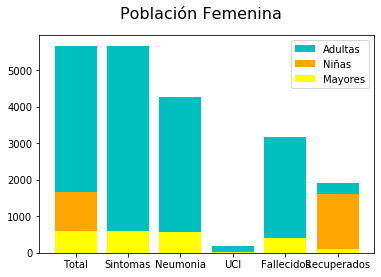

In [4]:
fig,ax=pp.subplots()

fig.suptitle('Población Femenina', fontsize=16)


ax.bar('Total',len(adultos_femenino),label='Adultas',color='c')
ax.bar('Total',len(niños_femenino),label='Niñas',color='orange')
ax.bar('Total',len(mayores_femenino),label='Mayores',color='yellow')


ax.bar('Sintomas',len(adultos_femenino),color='c')
ax.bar('Sintomas',len(niños_femenino_sintomas),color='orange')
ax.bar('Sintomas',len(mayores_femenino),color='yellow')

ax.bar('Neumonia',len(adultos_femeninos_nuemonia),color='c')
ax.bar('Neumonia',len(niños_femenino_nuemonia),color='orange')
ax.bar('Neumonia',len(mayores_femeninos_nuemonia),color='yellow')

ax.bar('UCI',len(adultos_femeninos_cuidados),color='c')
ax.bar('UCI',len(niños_femenino_cuidados),color='orange')
ax.bar('UCI',len(mayores_femeninos_cuidados),color='yellow')

ax.bar('Fallecidos',len(adultos_femeninos_fallecidos),color='c')
ax.bar('Fallecidos',len(niños_femenino_fallecidos),color='orange')
ax.bar('Fallecidos',len(mayores_femeninos_fallecidos),color='yellow')

ax.bar('Recuperados',len(adultos_femeninos_recuperados),color='c')
ax.bar('Recuperados',len(niños_femenino_recuperados),color='orange')
ax.bar('Recuperados',len(mayores_femeninos_recuperados),color='yellow')


ax.legend()

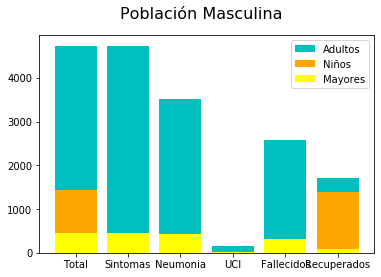

In [5]:
fig,ax=pp.subplots()

fig.suptitle('Población Masculina', fontsize=16)


ax.bar('Total',len(adultos_masculino),label='Adultos',color='c')
ax.bar('Total',len(niños_masculino),label='Niños',color='orange')
ax.bar('Total',len(mayores_masculino),label='Mayores',color='yellow')


ax.bar('Sintomas',len(adultos_masculino),color='c')
ax.bar('Sintomas',len(niños_masculino_sintomas),color='orange')
ax.bar('Sintomas',len(mayores_masculino),color='yellow')

ax.bar('Neumonia',len(adultos_masculino_nuemonia),color='c')
ax.bar('Neumonia',len(niños_masculino_nuemonia),color='orange')
ax.bar('Neumonia',len(mayores_masculino_nuemonia),color='yellow')

ax.bar('UCI',len(adultos_masculino_cuidados),color='c')
ax.bar('UCI',len(niños_masculino_cuidados),color='orange')
ax.bar('UCI',len(mayores_masculino_cuidados),color='yellow')

ax.bar('Fallecidos',len(adultos_masculino_fallecidos),color='c')
ax.bar('Fallecidos',len(niños_masculino_fallecidos),color='orange')
ax.bar('Fallecidos',len(mayores_masculino_fallecidos),color='yellow')

ax.bar('Recuperados',len(adultos_masculino_recuperados),color='c')
ax.bar('Recuperados',len(niños_masculino_recuperados),color='orange')
ax.bar('Recuperados',len(mayores_masculino_recuperados),color='yellow')


ax.legend()

In [6]:
import pandas as pd

resultado=pd.DataFrame(columns=('Total','Sintomas','Neumonia','UCI','Fallecidos','Recuperados'))
resultado.loc[len(resultado)]=[niñosTotal,niñosSintomas,niñosNeumonia,niñosUCI,niñosFallecidos,niñosRecuperados]
resultado=resultado.rename(index={0:'Niños'})

resultado.loc[len(resultado)]=[adultosTotal,adultosSintomas,adultosNeumonia,adultosUCI,adultosFallecidos,adultosRecuperados]
resultado=resultado.rename(index={1:'Adultos'})

resultado.loc[len(resultado)]=[mayoresTotal,mayoresSintomas,mayoresNeumonia,mayoresUCI,mayoresFallecidos,mayoresRecuperados]
resultado=resultado.rename(index={2:'Mayores'})
resultado

,Total,Sintomas,Neumonia,UCI,Fallecidos,Recuperados
Niños,3099,125,97,6,71,3018
Adultos,10409,4735,7787,327,5740,3639
Mayores,1046,452,1000,39,738,173
